## Import libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import ModelCheckpoint

## Load and preprocess the Data (Using Image Data Generator)

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('Final-data/train/',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory('Final-data/validation/',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('Final-data/test/',
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 198 images belonging to 2 classes.
Found 25 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


## Build the Model

In [3]:
#1-layered model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # Assuming 2 classes: potential and low potential dysgraphia
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 64)                25233472  
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 25234498 (96.26 MB)
Trainable params: 25234498 (96.26 MB)
Non-trainable params: 0 (0.00 Byte)
______________

## Compile the Model

In [5]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', 
              metrics=['accuracy', Precision(), Recall()])

## Train and Save the best model

In [6]:
checkpoint = ModelCheckpoint('best_model_layer1.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
history = model.fit(train_generator, epochs=100, validation_data=valid_generator,callbacks=[checkpoint])

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 5.4754 - accuracy: 0.5404 - precision: 0.5404 - recall: 0.5404
Epoch 1: val_accuracy improved from -inf to 0.36000, saving model to best_model_layer1.h5


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 22s 2s/step - loss: 5.4754 - accuracy: 0.5404 - precision: 0.5404 - recall: 0.5404 - val_loss: 7.0926 - val_accuracy: 0.3600 - val_precision: 0.3600 - val_recall: 0.3600
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 1.6762 - accuracy: 0.7222 - precision: 0.7222 - recall: 0.7222
Epoch 2: val_accuracy improved from 0.36000 to 0.64000, saving model to best_model_layer1.h5
7/7 [==============================] - 14s 2s/step - loss: 1.6762 - accuracy: 0.7222 - precision: 0.7222 - recall: 0.7222 - val_loss: 1.1212 - val_accuracy: 0.6400 - val_precision: 0.6400 - val_recall: 0.6400
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.7368 - accuracy: 0.7677 - precision: 0.7677 - recall: 0.7677
Epoch 3: val_accuracy improved from 0.64000 to 0.68000, saving model to best_model_layer1.h5
7/7 [==============================] - 14s 2s/step - loss: 0.7368 - accuracy: 0.7677 - precision: 0.7677 - recall: 0.7677 - val_loss: 0.

## Evaluate the Model

In [7]:
model.load_weights('best_model_layer1.h5')
test_loss, test_acc ,test_prec, test_recall= model.evaluate(test_generator)
print("Test Accuracy:", test_acc)
print("Test Precision:", test_prec)
print("Test F1-score:", test_recall)

1/1 [==============================] - 0s 458ms/step - loss: 1.0832 - accuracy: 0.7692 - precision: 0.7692 - recall: 0.7692
Test Accuracy: 0.7692307829856873
Test Precision: 0.7692307829856873
Test F1-score: 0.7692307829856873


## Model Metrics

In [8]:
Y_pred = model.predict(test_generator)
y_pred = tf.argmax(Y_pred, axis=1)
print("Classification Report:\n", classification_report(test_generator.classes, y_pred.numpy()))

1/1 [==============================] - 1s 973ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.76      0.72        17
           1       0.43      0.33      0.38         9

    accuracy                           0.62        26
   macro avg       0.56      0.55      0.55        26
weighted avg       0.60      0.62      0.60        26



In [9]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(test_generator.classes, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[13  4]
 [ 6  3]]


## Visualize

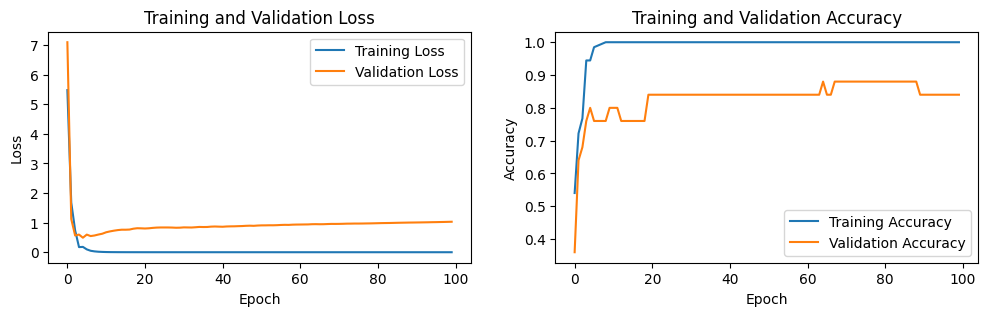

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

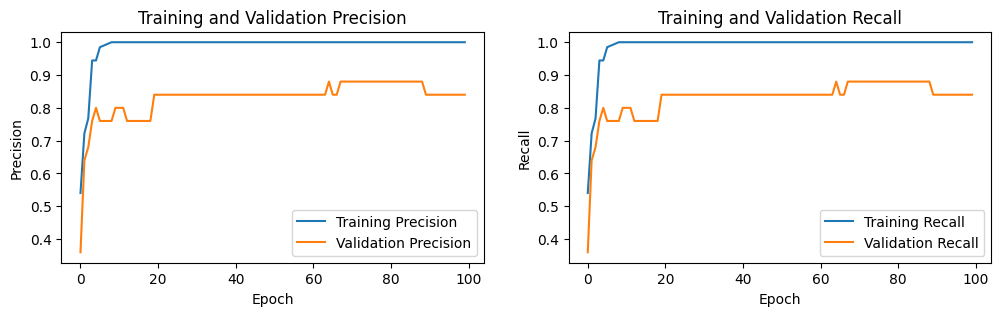

In [11]:
def plot_precision_recall(history):
    plt.figure(figsize=(12, 3))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['precision'], label='Training Precision')
    plt.plot(history.history['val_precision'], label='Validation Precision')
    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    plt.title('Training and Validation Precision')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['recall'], label='Training Recall')
    plt.plot(history.history['val_recall'], label='Validation Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.title('Training and Validation Recall')
    plt.legend()

    plt.show()

plot_precision_recall(history)